In [7]:
import numpy as np #basic python library
from landlab.components import ExponentialWeatherer
from landlab.components import DepthDependentDiffuser
from landlab import RasterModelGrid #Grid utility
import matplotlib.pyplot as plt #For plotting results
from matplotlib.pyplot import figure, legend, plot, show, title, xlabel, ylabel, ylim
import cv2 
import glob
from landlab import imshow_grid #For plotting results

In [8]:
#Set grid parameters
num_rows = 50
num_columns = 50
node_spacing = 1.00
node_next_to_outlet = num_columns + 1
outlet_node = 0 

mg = RasterModelGrid((num_rows, num_columns))


In [9]:
mg.add_zeros("soil__depth", at="node")

mg.add_zeros("bedrock__elevation", at="node")
mg.at_node["bedrock__elevation"] += (mg.node_y * .001 + mg.node_x * .001 + np.random.rand(len(mg.node_y)) / 100) #cm scale rn 

mg.add_zeros("topographic__elevation", at="node")

mg.at_node["topographic__elevation"][:] += mg.at_node["bedrock__elevation"]# + mg.at_node['soil__depth'][:]
mg.at_node["bedrock__elevation"][:] += mg.at_node["soil__depth"]

expweath = ExponentialWeatherer(mg)
DDdiff = DepthDependentDiffuser(mg)

expweath.calc_soil_prod_rate()
np.allclose(mg.at_node['soil_production__rate'][mg.core_nodes], 1.)






True

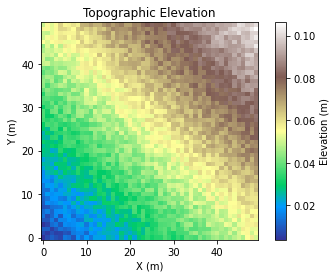

In [10]:
#Instantiate figure as empty plot
figelev = plt.figure()

#Instantiate subplot as empty plot
plot = plt.subplot()

#Create a topographic elevation plot that shows the elevation of the landscape in diff colors - using landlab utility imshow_grid
imshow_grid(mg, 'topographic__elevation', plot_name='Topographic Elevation', var_name = 'Elevation', var_units=r'm', grid_units=('m', 'm'), cmap='terrain',color_for_background=None)


In [11]:
for x in range(2):
    DDdiff.run_one_step(1)

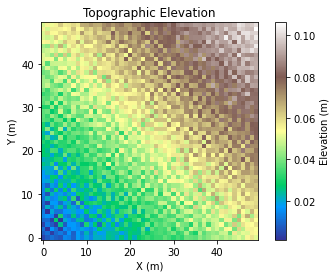

In [12]:
#Instantiate figure as empty plot
figelev = plt.figure()

#Instantiate subplot as empty plot
plot = plt.subplot()

#Create a topographic elevation plot that shows the elevation of the landscape in diff colors - using landlab utility imshow_grid
imshow_grid(mg, 'topographic__elevation', plot_name='Topographic Elevation', var_name = 'Elevation', var_units=r'm', grid_units=('m', 'm'), cmap='terrain',color_for_background=None)
